## Analyse de la base de données 'Chocolates' 

La base de données est disponible en open source sur gitbub. Elle contient des informations sur diverses marques de chocolats.

voici une description des colonnes contenues dans la base: 
- `Name` : L'Appellation du produit
- `MFR` : La marque
- `Country` : Le pays de fabrication
- `Type` : Chocolat noir ou au lait.
- `calories, CalFat, SatFat, Chol, NA, Carbs, Fiber, Sugars, Protein` : Représente respectivement le nombre de calories et les valeurs nutritionnelles


L'objectif de cette analyse est **de regrouper les différents types de chocolats en fonction des informations renseignées afin de mieux adresser les différentes cibles qui les achètent**

Ces informations peuvent être utilisées pour optimiser la stratégie de marque/distributeur ou favoriser l'innovation  

In [44]:
#Import des packages nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering

In [45]:
#Aperçu de la base
path="C:/Users/miche/OneDrive/Documents/Mes Projets Git hub/Bases projets"
df=pd.read_csv(path+"/chocolates.csv")
display(df.head(3))
display(df.info())
display(df.shape)

,Name,MFR,Country,Type,Calories,CalFat,TotFat,SatFat,Chol,Na,Carbs,Fiber,Sugars,Protein
0,Noir 86% Cacao,Cote D'Or,Belgium,Dark,460.000000,380.000000,44.00000,26.000000,0.0,0.0,28.000000,10.000000,10.000000,8.000000
1,70% Cocoa,Cote D'Or,Belgium,Dark,600.000000,432.000000,48.00000,30.000000,10.0,0.0,42.000000,10.000000,28.000000,8.000000
2,Solid Dark Chocolate Bar,Godiva,Belgium,Dark,534.883721,302.325581,32.55814,20.930233,0.0,0.0,60.465116,9.302326,46.511628,6.976744


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      88 non-null     object 
 1   MFR       88 non-null     object 
 2   Country   88 non-null     object 
 3   Type      88 non-null     object 
 4   Calories  88 non-null     float64
 5   CalFat    88 non-null     float64
 6   TotFat    88 non-null     float64
 7   SatFat    88 non-null     float64
 8   Chol      88 non-null     float64
 9   Na        88 non-null     float64
 10  Carbs     88 non-null     float64
 11  Fiber     88 non-null     float64
 12  Sugars    88 non-null     float64
 13  Protein   88 non-null     float64
dtypes: float64(10), object(4)
memory usage: 9.8+ KB


None

(88, 14)

In [46]:
#Création d'une nouvelle colonne composée de Name, Marque et le type pour avoir un niveau appellation_type
df['Appellation_Type']=df['Name']+"_"+df['MFR']+"_"+df['Type']

In [47]:
#Indexation de la nouvelle colonne avec la variable créee
df=df.set_index('Appellation_Type')
df.head(3)

,Name,MFR,Country,Type,Calories,CalFat,TotFat,SatFat,Chol,Na,Carbs,Fiber,Sugars,Protein
Appellation_Type,,,,,,,,,,,,,,
Noir 86% Cacao_Cote D'Or_Dark,Noir 86% Cacao,Cote D'Or,Belgium,Dark,460.000000,380.000000,44.00000,26.000000,0.0,0.0,28.000000,10.000000,10.000000,8.000000
70% Cocoa_Cote D'Or_Dark,70% Cocoa,Cote D'Or,Belgium,Dark,600.000000,432.000000,48.00000,30.000000,10.0,0.0,42.000000,10.000000,28.000000,8.000000
Solid Dark Chocolate Bar_Godiva_Dark,Solid Dark Chocolate Bar,Godiva,Belgium,Dark,534.883721,302.325581,32.55814,20.930233,0.0,0.0,60.465116,9.302326,46.511628,6.976744


In [48]:
#Vérification des valeurs manquantes
df.isna().sum()

Name        0
MFR         0
Country     0
Type        0
Calories    0
CalFat      0
TotFat      0
SatFat      0
Chol        0
Na          0
Carbs       0
Fiber       0
Sugars      0
Protein     0
dtype: int64

In [49]:
#Affichage des variables catégorielles
for i in df[['Name', 'MFR', 'Country','Type']]:
          display(df[i].value_counts())

Name
Milk Chocolate                          7
Dark Chocolate Bar                      6
Dark Chocolate                          4
Alpine Milk Chocolate                   2
Dark Chocolate Bar 86%                  2
                                       ..
Promises Silky Smooth Dark Chocolate    1
Dark Chocolate Large Tablet Bar         1
Chocollate, 100% Cacao                  1
70% Cocoa                               1
41% Cacao Milk Chocolate                1
Name: count, Length: 71, dtype: int64

MFR
Hershey's                 8
Dove                      8
Poulain                   6
President's Choice        5
Lindt                     5
Nestle                    5
Scharffen Berger          4
Ritter Sport              4
Cote D'Or                 3
Celtic                    3
Ghiradelli                3
Thorntons                 3
Godiva                    3
Green & Black's           3
Guylian                   3
Cadbury                   2
Sainsbury's               2
Toblerone                 2
Choceur                   2
Nacional De Chocolates    2
Trader Joe's              2
Milka                     2
Bendicks                  1
Chocolove                 1
Dagoba                    1
Merci                     1
Mars                      1
Meijer                    1
Starbucks                 1
Jet                       1
Name: count, dtype: int64

Country
US             30
Switzerland    15
UK             14
France         11
Belgium         9
German          4
Colombia        3
Austria         2
Name: count, dtype: int64

Type
Dark    56
Milk    32
Name: count, dtype: int64

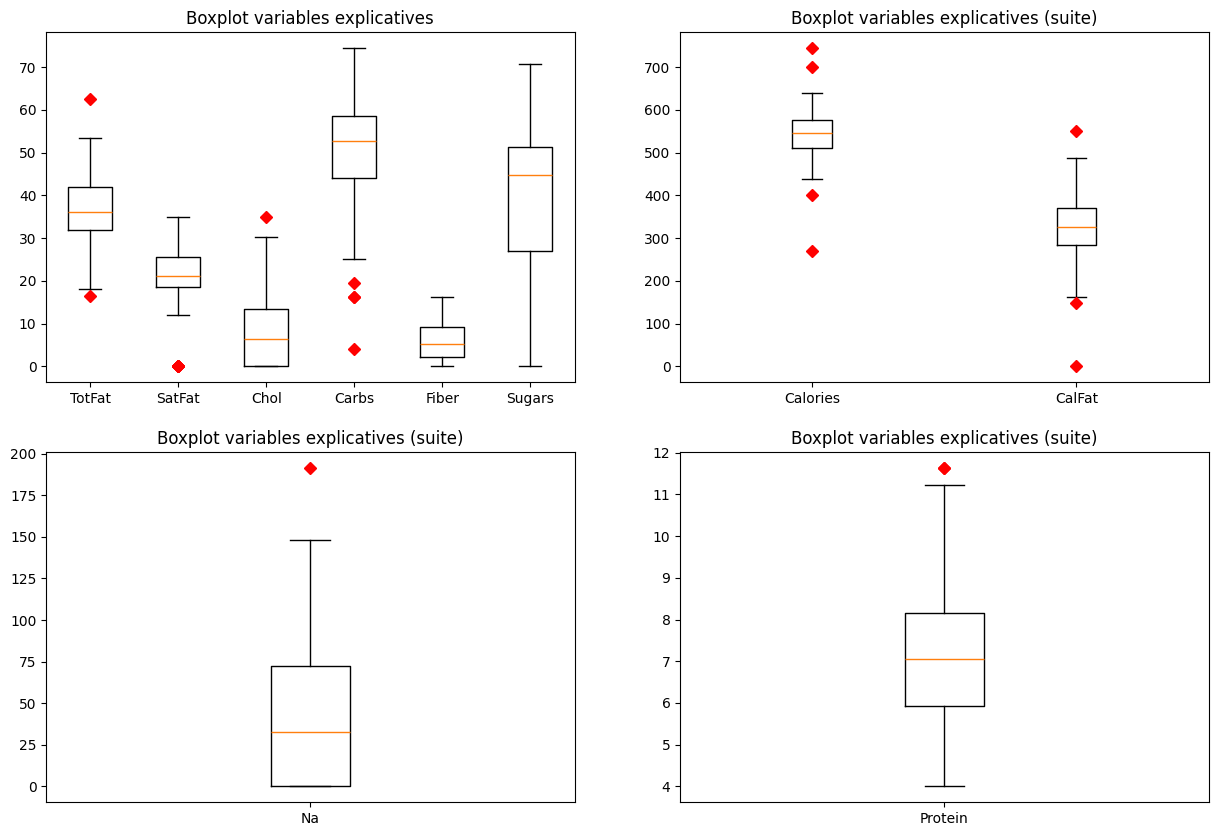

In [50]:
#Affichage de la distribution des variables numériques
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.title('Boxplot variables explicatives')
plt.boxplot(df[['TotFat', 'SatFat', 'Chol', 'Carbs', 'Fiber','Sugars']].values, 0, 'rD', labels = ['TotFat', 'SatFat', 'Chol', 'Carbs', 'Fiber','Sugars']);
plt.subplot(222)
plt.title('Boxplot variables explicatives (suite)')
plt.boxplot(df[['Calories','CalFat']].values, 0, 'rD', labels = ['Calories','CalFat']);
plt.subplot(223)
plt.title('Boxplot variables explicatives (suite)')
plt.boxplot(df['Na'].values, 0, 'rD', labels = ['Na']);
plt.subplot(224)
plt.title('Boxplot variables explicatives (suite)')
plt.boxplot(df['Protein'].values, 0, 'rD', labels = ['Protein']);

In [51]:
#Sélection & vérification de la cohérence des lignes qui ont une valeur de la variable Na >175 par exemple
display(df.loc[df['Na']>175])
#ou calories >650
display(df.loc[df['Calories']>650])

,Name,MFR,Country,Type,Calories,CalFat,TotFat,SatFat,Chol,Na,Carbs,Fiber,Sugars,Protein
Appellation_Type,,,,,,,,,,,,,,
"Swiss, Milk Gold_Lindt_Milk","Swiss, Milk Gold",Lindt,Switzerland,Milk,543.367347,278.061224,30.867347,20.408163,12.755102,191.326531,58.928571,2.55102,56.377551,7.653061


,Name,MFR,Country,Type,Calories,CalFat,TotFat,SatFat,Chol,Na,Carbs,Fiber,Sugars,Protein
Appellation_Type,,,,,,,,,,,,,,
Dark Chocolate 85% cocoa_Green & Black's_Dark,Dark Chocolate 85% cocoa,Green & Black's,UK,Dark,700.000000,550.000000,62.500000,35.000000,0.0,0.0,25.000000,10.0,12.500000,7.500000
Dark Chocolate Bar 60%_Scharffen Berger_Dark,Dark Chocolate Bar 60%,Scharffen Berger,US,Dark,744.186047,418.604651,46.511628,27.906977,0.0,0.0,74.418605,0.0,53.488372,9.302326


In [52]:
#Sélection des variables numériques
df_numeric=df[['Calories','CalFat','TotFat', 'SatFat', 'Chol', 'Na', 'Carbs', 'Fiber','Sugars','Protein']]
df_numeric.head()

,Calories,CalFat,TotFat,SatFat,Chol,Na,Carbs,Fiber,Sugars,Protein
Appellation_Type,,,,,,,,,,
Noir 86% Cacao_Cote D'Or_Dark,460.000000,380.000000,44.000000,26.000000,0.0,0.000000,28.000000,10.000000,10.000000,8.000000
70% Cocoa_Cote D'Or_Dark,600.000000,432.000000,48.000000,30.000000,10.0,0.000000,42.000000,10.000000,28.000000,8.000000
Solid Dark Chocolate Bar_Godiva_Dark,534.883721,302.325581,32.558140,20.930233,0.0,0.000000,60.465116,9.302326,46.511628,6.976744
72% Extra Dark Chocolate_Godiva_Dark,534.883721,348.837209,39.534884,20.930233,0.0,81.395349,41.860465,13.953488,27.906977,9.302326
Extra Dark Chocolate Bar_Guylian_Dark,575.757576,333.333333,39.393939,24.242424,0.0,90.909091,48.484848,12.121212,33.333333,9.090909


## Construction de la matrice des distances

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples

# Calcul de la matrice de similarité/dissimilarité
linkage_matrix = linkage(df_numeric, method='ward', metric='euclidean')#Ward : Cette méthode minimise la somme des carrés des écarts au sein des clusters.

# La méthode du ward linkage consiste à réunir les deux clusters dont le regroupement fera le moins baisser l'inertie interclasse. 
# C'est la distance de Ward qui est utilisée:la distance entre deux classes est celle de leurs barycentres au carré, pondérée par les effectifs des deux clusters.
  

## Construction du dendogramme 

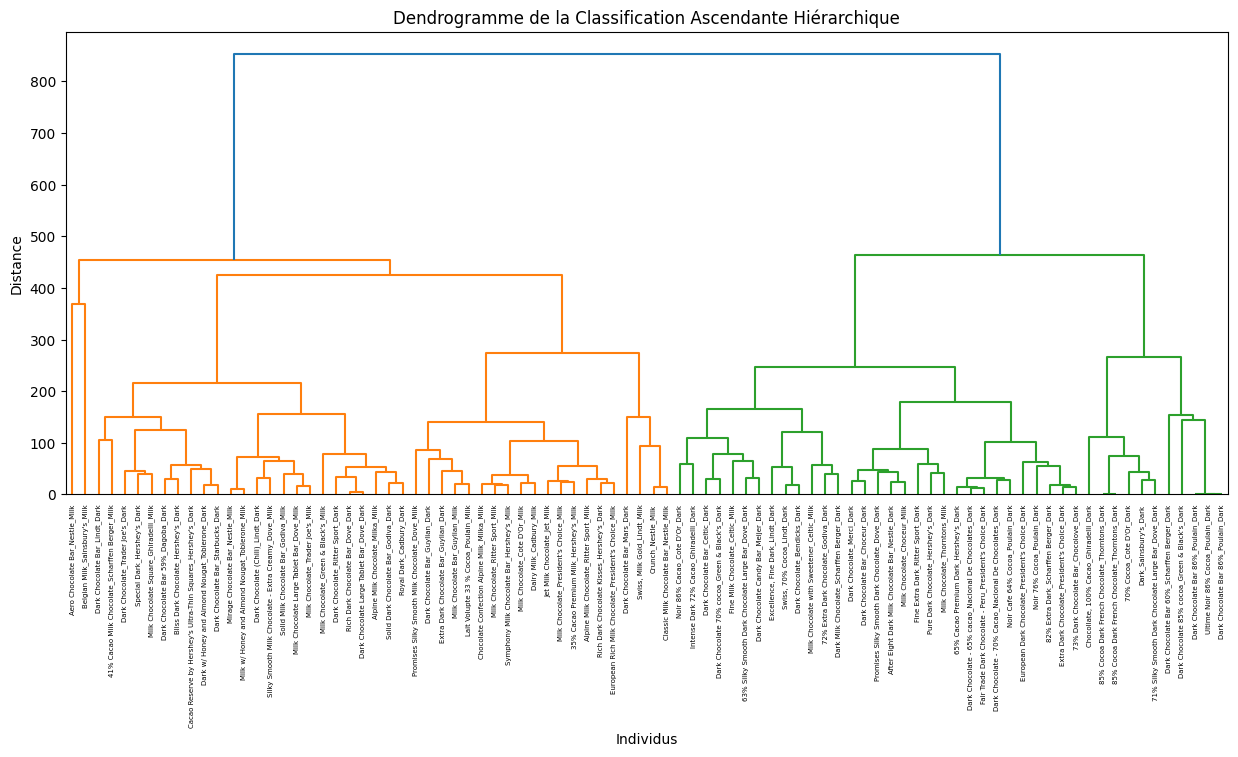

In [54]:
# Affichage du dendrogramme
plt.figure(figsize=(15, 6))
dendrogram(linkage_matrix, labels = df_numeric.index, leaf_rotation = 90.)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

#Une avons ici une suggestion de 2 classes  

In [55]:
#Création du classifieur utilisant 2 centres, entrainement de l'algorithme et calcul des labels
clf= AgglomerativeClustering(n_clusters=2)
clf.fit(df_numeric)
label = clf.labels_

#Evaluation du clustering grâce au silhouette_score avec les 2 classes
from sklearn.metrics import silhouette_score
silhouette_score(df_numeric, label, metric='sqeuclidean')

0.43041294049021683

## Choix du nombre de clusters optimals

In [56]:
#Pour pouvoir choisir le nombre de cluster optimal, je vais entraîner l'algorithme CAH pour différentes valeurs de n_clusters et calculer le coefficient de silhouette pour chaque modèle entraîné.
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
s_scores = []
for i in range_n_clusters:
    clf=AgglomerativeClustering(n_clusters=i)
    clf.fit(df_numeric)
    label = clf.labels_
    coef=silhouette_score(df_numeric, label, metric='sqeuclidean')
    s_scores.append(coef)
print(s_scores)

[0.43041294049021683, 0.25895318117483784, 0.31726936191249383, 0.3586737769099686, 0.3678356600937501, 0.35921223969120697, 0.33063835179012746, 0.3428228260583879, 0.3295715970798072, 0.28089206820583645, 0.3093985277148443, 0.26872376680776405, 0.27421134864207003]


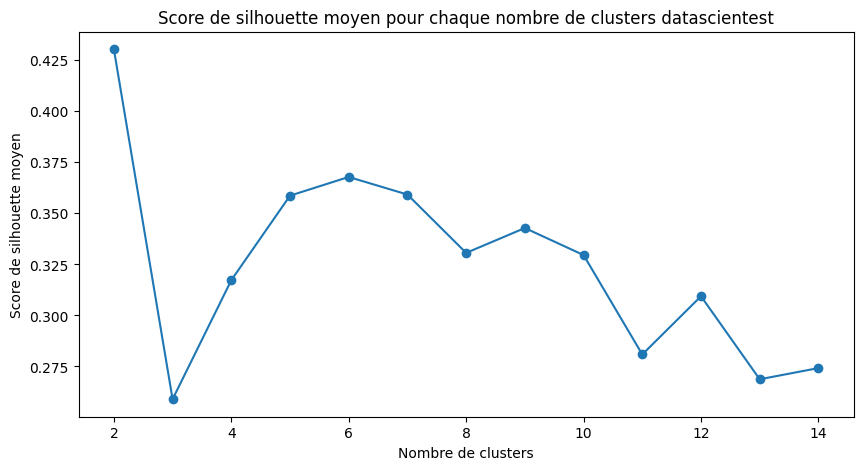

In [63]:
#Graphique des coefficients de silhouette en fonction du nombre de clusters correspondants.
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, s_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters datascientest")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

In [58]:
#Le nombre de clusters pour lequel nous avons les scores les plus elevés pour ce set de données est de 2(s_score=0.43) suivi de 6(s_score=0.36)
#on peut donc relancer l'agorithme avec 6 clusters pour voir si nous avons des groupes pertinents qui offrent plus de granularité (ce point est à valider en collaboration avec les utilisateurs)
# Effectuer la CAH avec le nombre de clusters choisi: 6


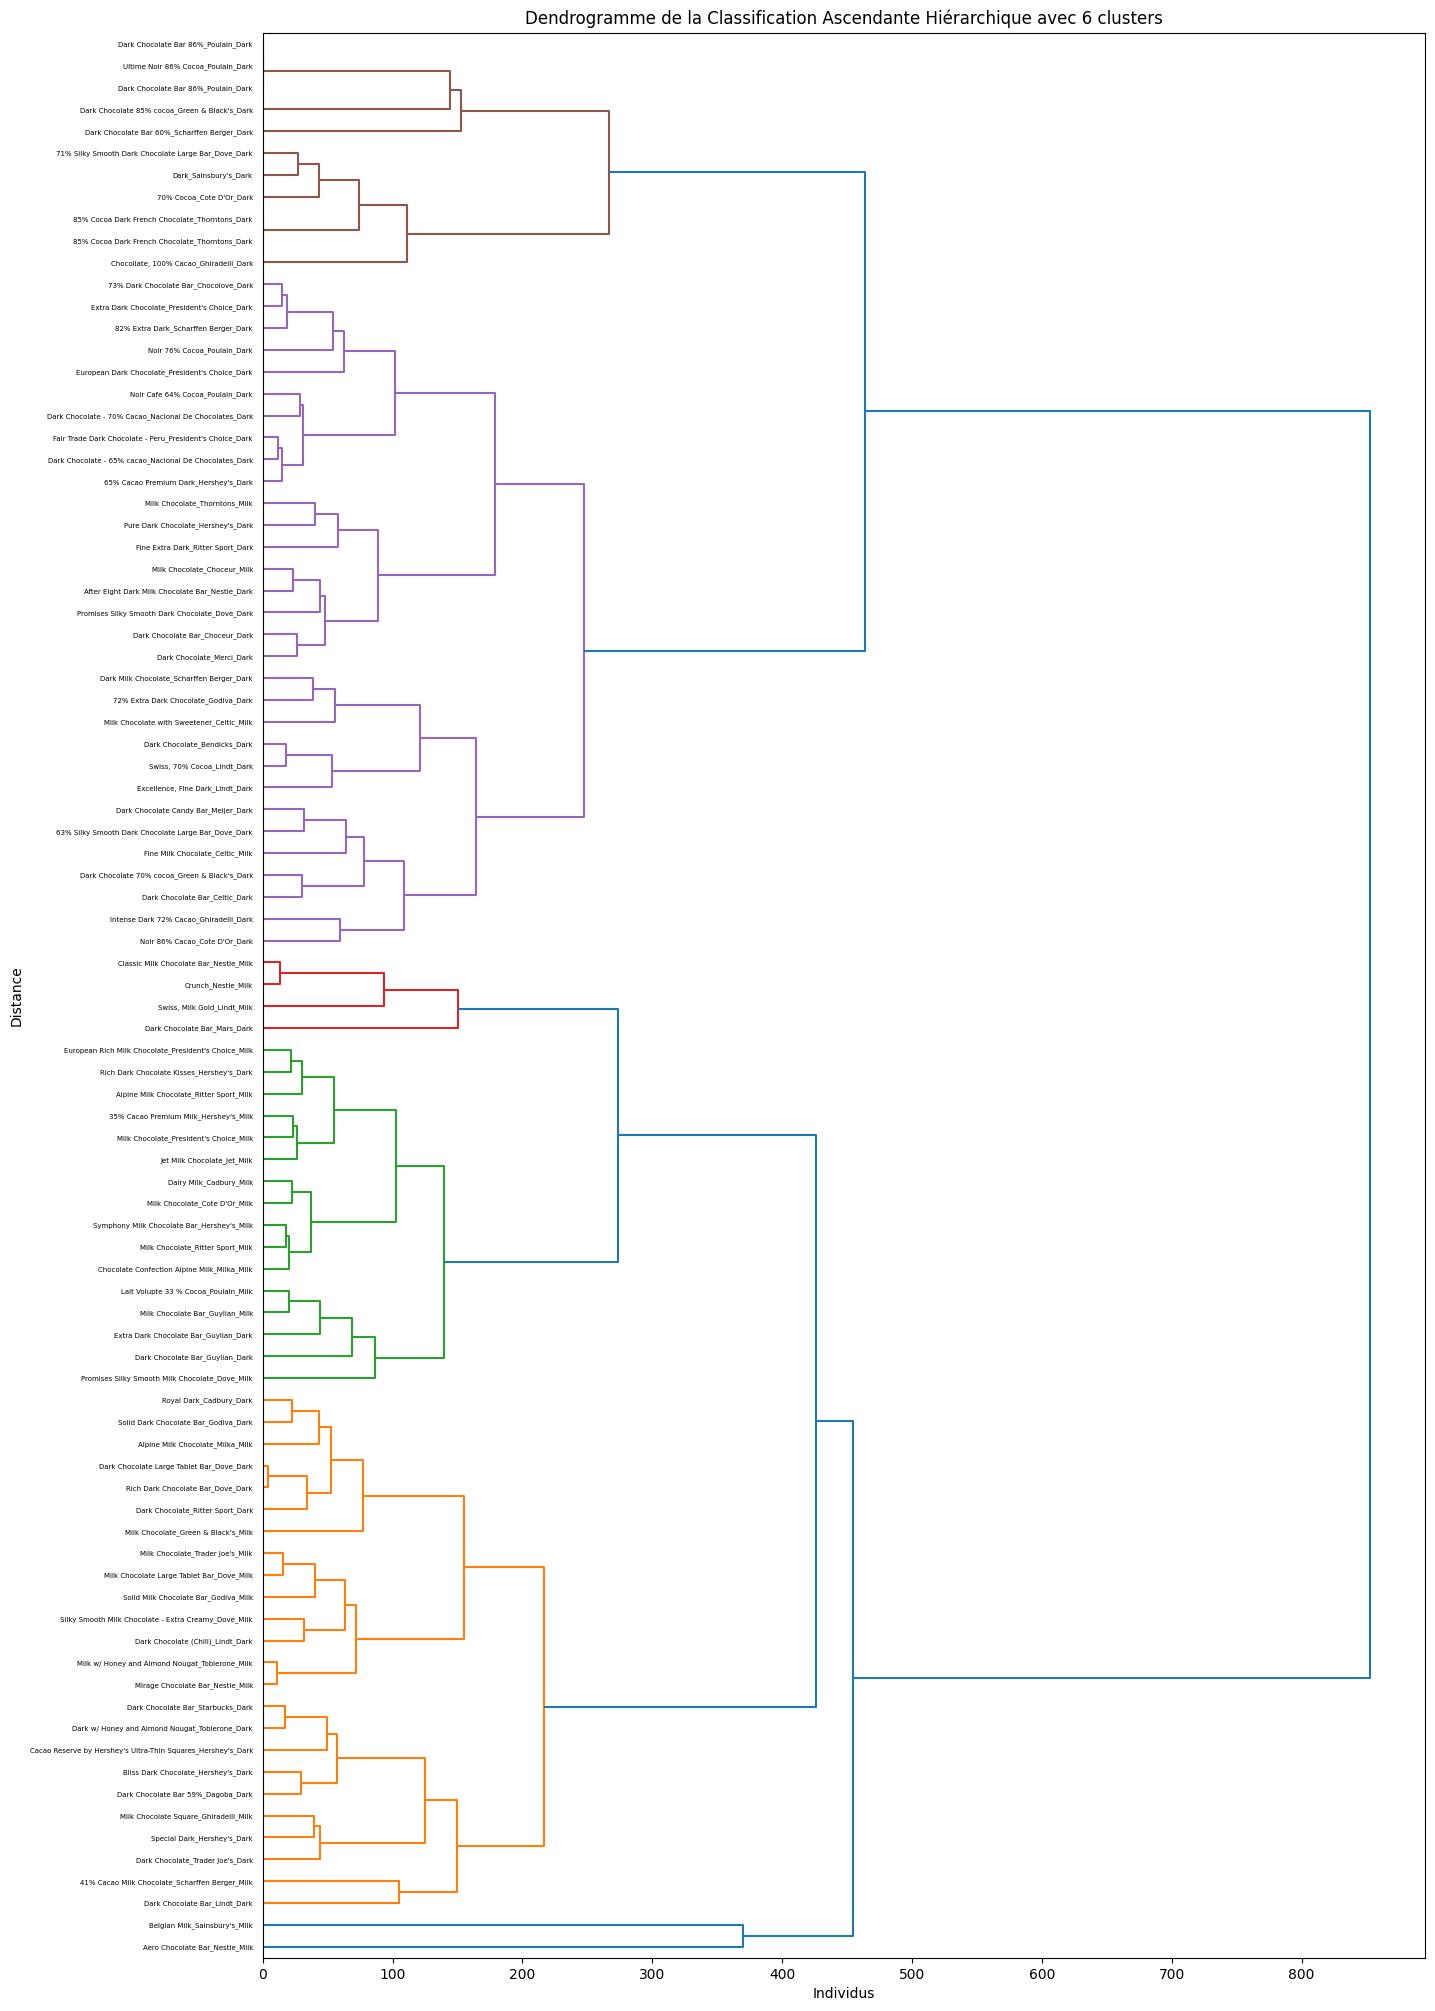

In [59]:
# Affichage du dendrogramme avec nos 6 clusters
linkage_matrix = linkage(df_numeric, method='ward', metric='euclidean')
plt.figure(figsize=(15, 25))
dendrogram(linkage_matrix,p=6, labels = df_numeric.index,  color_threshold = 270, orientation='right')
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique avec 6 clusters')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

## Description des 6  groupes

In [60]:
#Interpretation et résumé des groupes de chocolats
#calcul de la moyenne des variables explicatives
num_clusters = 6

clf= AgglomerativeClustering(n_clusters=num_clusters)
clf.fit(df_numeric)

# Ajout des informations de cluster dans le DataFrame
df['Cluster'] = clf.labels_
#Re-indexation et affichage du df avec les clusters
df=df.reset_index()
df.head(3)

,Appellation_Type,Name,MFR,Country,Type,Calories,CalFat,TotFat,SatFat,Chol,Na,Carbs,Fiber,Sugars,Protein,Cluster
0,Noir 86% Cacao_Cote D'Or_Dark,Noir 86% Cacao,Cote D'Or,Belgium,Dark,460.000000,380.000000,44.00000,26.000000,0.0,0.0,28.000000,10.000000,10.000000,8.000000,2
1,70% Cocoa_Cote D'Or_Dark,70% Cocoa,Cote D'Or,Belgium,Dark,600.000000,432.000000,48.00000,30.000000,10.0,0.0,42.000000,10.000000,28.000000,8.000000,1
2,Solid Dark Chocolate Bar_Godiva_Dark,Solid Dark Chocolate Bar,Godiva,Belgium,Dark,534.883721,302.325581,32.55814,20.930233,0.0,0.0,60.465116,9.302326,46.511628,6.976744,4


In [61]:
# Afficher les statistiques des clusters
dico={'Calories':'mean','CalFat':'mean', 'TotFat':'mean','SatFat':'mean', 'Chol':'mean', 'Na':'mean','Carbs':'mean', 'Fiber':'mean','Sugars':'mean','Protein':'mean', 'Type':'nunique','MFR':'nunique', 'Appellation_Type':'nunique'}
cluster_stats = df.groupby('Cluster').agg(dico)
cluster_stats

,Calories,CalFat,TotFat,SatFat,Chol,Na,Carbs,Fiber,Sugars,Protein,Type,MFR,Appellation_Type
Cluster,,,,,,,,,,,,,
0,548.025176,285.481841,31.979499,18.692040,14.927847,101.447776,59.272598,3.730759,50.502786,6.674795,2,13,20
1,612.294775,451.452431,50.310390,30.594231,0.909091,2.181818,34.325159,7.668227,19.518423,8.931320,1,8,9
2,557.268668,354.647990,40.034727,21.976399,5.014205,24.173043,43.850709,6.373655,28.572744,7.889232,2,20,31
3,270.000000,147.500000,16.500000,22.250000,0.000000,0.000000,25.000000,1.000000,47.750000,4.500000,1,1,1
4,495.253388,286.952785,31.842905,17.582548,9.550152,27.654301,57.302071,5.414997,44.309884,6.285336,2,15,24
5,585.365854,0.000000,31.707317,19.512195,24.390244,109.756098,70.731707,0.000000,70.731707,4.878049,1,1,1


**cluster 0** (branches en vert):  qui regroupe 13 marques et une grande majorité de chocolat au lait
**cluster 1**(branches en marron): Uniquement des chocolats noirs et une très faible teneur en sucre
**cluster 2** (branches en violet): des marques avec une teneur en cacao spécifié jusqu'a 80%, plutôt premium avec l'un des plus bas taux de sucre
**cluster 4**(branches en orange): est composé des 2 types de chocolats, avec des teneurs en cacao majoritairement non spécifié: des entrées de gammes
**Clusters 3 et 5** constitués de produits très segmentant(très peu)

#Ces données peuvent être également croisées au besoin avec des données socio-démographiques pour plus d'insights
